In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm

# Set device to CUDA if available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data augmentation and normalization for training
# You can adjust these transformations based on your dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Data loading
data_dir = './imgPeople'  # Update this path
train_dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

# Define the model
model = models.vgg16(pretrained=True)  # You can use other VGG variants as well
num_classes = len(train_dataset.classes)
model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)  # Change the output layer
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 10  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Save the trained model
torch.save(model.state_dict(), 'face_classifier.pth')


Using device: cuda:0


Epoch [1/10], Loss: 3.0262


Epoch [2/10], Loss: 0.9981


Epoch [3/10], Loss: 0.3958


Epoch [4/10], Loss: 0.2349


Epoch [5/10], Loss: 0.1705


Epoch [6/10], Loss: 0.1426


Epoch [7/10], Loss: 0.1168


Epoch [8/10], Loss: 0.1031


Epoch [9/10], Loss: 0.0810


Epoch [10/10], Loss: 0.0877


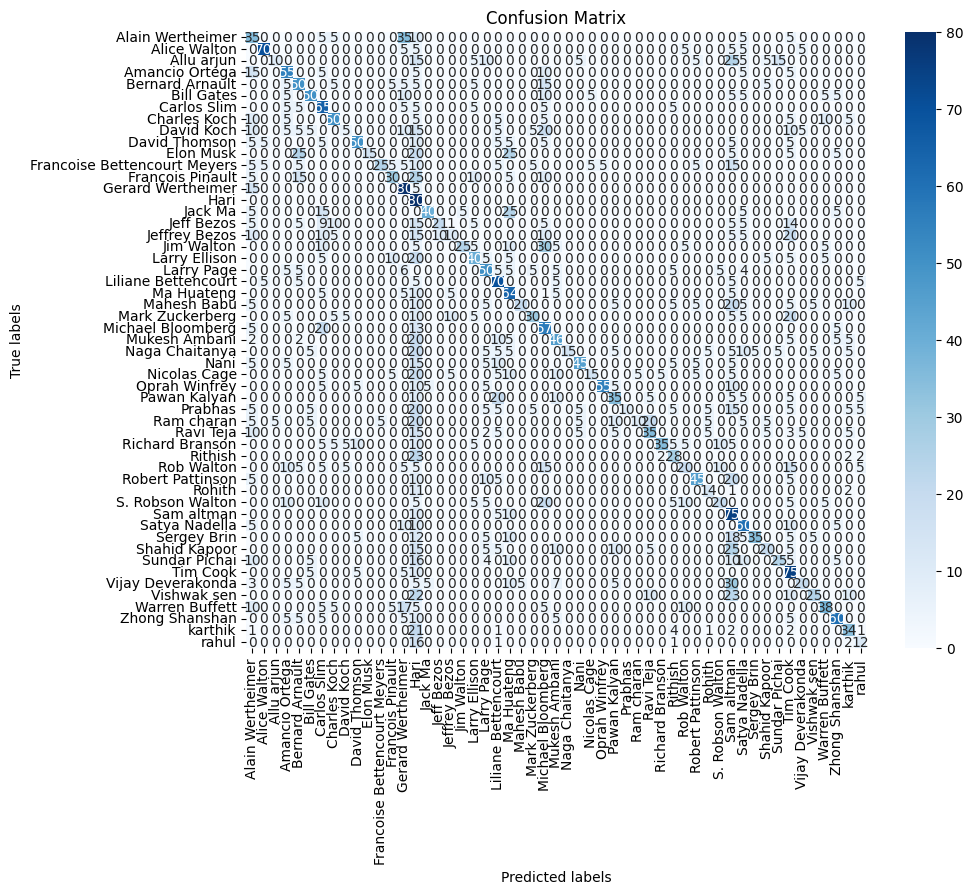

In [18]:
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a validation dataloader called 'val_loader' and you've already trained your model
model.eval()
y_true = []
y_pred = []

class_names = val_loader.dataset.classes  # Retrieve class names from the dataset

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
